# <center> **TA136 - Taller de Procesamiento de Señales**
## <center> **Trabajo Práctico 3: Regresión Logística**

---
---

### <center> Introducción

&ensp; En el presente trabajo se desarrolla un modelo de clasificación utilizando regresión logística, aplicado al reconocimiento de imágenes de gatos y perros. Para ello, se utilizó una base de datos descargada desde `Kaggle`, compuesta por $24.998$ imágenes. Estas fueron procesadas convirtiéndolas a escala de grises y redimensionadas a $16 \times 16$ píxeles para facilitar el tratamiento computacional.

&ensp; A lo largo del trabajo, se analizan conceptos teóricos fundamentales como la función sigmoide, su inversa y su derivada, así como la función de costo basada en la entropía cruzada. Se implementan diferentes estrategias de clasificación según la regresión logística, incluyendo regularización con distintos valores de hiperparámetros, y se evalúa su desempeño mediante la *accuracy* y la *cross-entropy* en los conjuntos de entrenamiento y testeo.

&ensp; Además, se compara el comportamiento de los modelos con y sin regularización, y se analiza su desempeño mediante la curva ROC, contrastando también con un clasificador aleatorio. La implementación se llevó a cabo íntegramente en $\texttt{Python}$, utilizando bibliotecas como `Sklearn`, `Numpy`, `Matplotlib` y `PIL`.

---
---

### <center> Desarrollo

&ensp; Se desea desarrollar un clasificador de imágenes de gatos y perros utilizando regresión logística. Para ello, descargar la base de datos $\texttt{dog-and-cat-classification-dataset}$ de kaggle. 


---

#### (A). *Análisis:*

**1. Calcular la función inversa $\sigma^{-1}(p)$ con $p \in (0, 1)$.**

&ensp; Considerando que la función Sigmoide está dada por la siguiente expresión.

$$ \sigma (z) = \frac{1}{1 + e^{-z}} $$

&ensp; A fin de encontrar su inversa, se procede analíticamente de forma tal que:

$$ \sigma (z) = \frac{1}{1 + e^{-z}} \Longrightarrow  z = - \log \left(  \frac{1}{\sigma} - 1 \right) 
$$

&ensp; A partir de esto:

$$ z = - \log \left(  \frac{1}{\sigma} - 1 \right) \Longrightarrow z = - \log \left( \frac{1 - \sigma}{\sigma} \right)$$

&ensp; Y teniendo en cuenta que $-\log \left( \frac{A}{B} \right) = \log \left( \frac{B}{A} \right)$, se tiene:

$$ z = - \log \left( \frac{1 - \sigma}{\sigma} \right) \Longrightarrow z = \log \left( \frac{\sigma}{1 - \sigma} \right)$$

&ensp; De esta manera, considerando que $p = \sigma$ y que, al ser la función Sigmoide estará acotada entre $(0, 1)$, se obtiene el siguiente resultado:

$$ \sigma^{-1} (p) = \log \left( \frac{p}{1 - p} \right) $$

**2. Sea $p = \sigma(z)$ la función sigmoide, calcular la derivada $\sigma '(z)$.**

&ensp; En base a la expresión presentada anteriormente, se calcula la derivada de la misma considerando la propiedad de la derivada de una división, donde:

$$ \frac{d}{dx} \left( \frac{f(x)}{g(x)} \right)= \frac{\frac{d f(x)}{dx} \cdot g(x) - f(x) ~ \frac{dg(x)}{dx}}{g(x)^2}$$

&ensp; Así, se procede analíticamente, tal que:

$$ \frac{d ~ \sigma(z)}{dz}  = \frac{d}{dz} \left( \frac{1}{1 + e^{-z}} \right) \Longrightarrow \frac{d ~ \sigma(z)}{dz}  = \frac{e^{-z}}{ \left( 1 + e^{-z} \right) ^2} $$  

&ensp; Ahora, se busca expresar el resultado en función de $\sigma(z) = p$, por lo tanto, se desarrolla lo siguiente:

$$ 1 - \underbrace{\sigma (z)}_{p} =  1 - \frac{1}{1 + e^{-z}} \Longrightarrow 1 - p = \frac{e^{-z}}{1 + e^{-z}} $$  

&ensp; De este modo, se obtiene que:

$$\underbrace{\frac{d ~ \sigma (z)}{dz}}_{\frac{dp}{dz}} = \underbrace{\frac{e^{-z}}{ 1 + e^{-z}}}_{1-p} \cdot \underbrace{\frac{1}{ 1 + e^{-z}}}_{p} \Longrightarrow \frac{dp}{dz} = (1 - p) \cdot p$$

**3. Hallar una expresión analítica para la función costo y su gradiente.**

&ensp; Teniendo en cuenta la expresión de la función costo de la regresión logística:

$$ J(w) = - \frac{1}{n} \sum_{i=1}^{n} \left[ Y_i \log \left( \sigma (w^T X_i + b) \right) + (1- Y_i) \log \left( 1 - \sigma (w^T X_i + b )\right) \right]$$

&ensp; Se calcula su gradiente teniendo en cuenta las propiedades para las derivadas matriciales, tal que:

$$ \nabla J(w) = \frac{d ~ J(w)}{dw} =  \frac{d}{dw} \left(  - \frac{1}{n} \sum_{i=1}^{n} \left[ Y_i \log \left( \sigma (w^T X_i + b) \right) + (1 - Y_i) \log \left( 1 - \sigma (w^T X_i + b )\right) \right] \right)$$

&ensp; Los únicos términos que dependen de $w$ son los siguientes:

$$\frac{d}{dw} \left[ \log \left( \sigma (w^T X_i + b) \right) \right] ~~ \text{y} ~~ \frac{d}{dw} \left[ \log \left( 1 - \sigma (w^T X_i + b )\right) \right]$$

&ensp; A modo de simplificar, se realiza un cambio de variables tal que $z = w^T X_i + b$ y se multiplica por $\frac{dz}{dz}$, tal que:

$$\frac{dz}{dw} \frac{d}{dz} \left[ \log \left( \sigma (z) \right) \right] ~~ \text{y} ~~ \frac{dz}{dw} \frac{d}{dz} \left[ \log \left( 1 - \sigma (z)\right) \right]$$

&ensp; De esta manera, teniendo que:

$$\frac{dz}{dw} = \frac{d}{dw} \left( w^T X_i + b \right) \Longrightarrow \frac{dz}{dw} = X_i, $$

$$ \frac{d}{dz} \left[ \log \left( \sigma (z) \right) \right] = \frac{1}{\sigma (z)} \frac{d ~ \sigma(z)}{dz} \Longrightarrow \frac{d}{dz} \left[ \log \left( \sigma (z) \right) \right] = 1 - \sigma(z), $$

$$ \frac{d}{dz} \left[ \log \left( 1 - \sigma (z)\right) \right] = \frac{1}{1 - \sigma (z)} \left( - \frac{d ~ \sigma(z)}{dz} \right) \Longrightarrow \frac{d}{dz} \left[ \log \left( \sigma (z) \right) \right] = -\sigma(z).$$

&ensp; Se tiene que:

$$\frac{dz}{dw} \frac{d}{dz} \left[ \log \left( \sigma (z) \right) \right] = (1 - \sigma(z)) \cdot X_i ~~ \text{y} ~~ \frac{dz}{dw} \frac{d}{dz} \left[ \log \left( 1 - \sigma (z)\right) \right] = - \sigma (z) \cdot X_i $$
 
&ensp; Por lo tanto, en la expresión general:

$$ \frac{d}{dw} \left(  - \frac{1}{n} \sum_{i=1}^{n} \left[ Y_i \log \left( \sigma (w^T X_i + b) \right) + (1 - Y_i) \log \left( 1 - \sigma (w^T X_i + b )\right) \right] \right) = - \frac{1}{n} \sum_{i=1}^{n} \left[ Y_i \cdot (1 - \sigma(z) \cdot X_i) + (1 - Y_i) \cdot (- \sigma (z) \cdot X_i) \right] = - \frac{1}{n} \sum_{i=1}^{n} \left[ Y_i - \sigma (z) \right] X_i$$

&ensp; Finalmente, reemplazando por el cambio de variable se obtiene el siguiente resultado:

$$ \nabla J(w) = \frac{d ~ J(w)}{dw} = - \frac{1}{n} \sum_{i=1}^{n} \left[ Y_i - \sigma (w^T X_i + b) \right] X_i$$

---

#### (B). *Pre-Procesamiento:*

**1. Las imágenes poseen diferentes tamaños. Convertirlas todas a $16 \times 16$ utilizando $\texttt{resize}$ (PIL).**

**2. Las imágenes también poseen diferentes formatos. Convertirlas todas a escala de grises.**

&ensp; A partir de la librería `Kaggle`, se descargó la base de datos de $24.998$ imágenes utilizada para el presente trabajo práctico. Cabe destacar que se utilizó la librería `Glob` para acceder de manera ordenada a las rutas de las imágenes de gatos y perros, y la librería `PIL` para abrir y procesar dichas imágenes. Estas fueron convertidas a escala de grises y redimensionadas a un tamaño de $16 \times 16$ píxeles, tal como se requiere en este inciso del enunciado.

In [153]:
import numpy as np
import matplotlib.pyplot as plt
import kagglehub
import glob
from PIL import Image

ruta_general = kagglehub.dataset_download("bhavikjikadara/dog-and-cat-classification-dataset")

ruta_gatos = sorted(glob.glob(ruta_general + '/PetImages/Cat/*.jpg'))
ruta_perros = sorted(glob.glob(ruta_general + '/PetImages/Dog/*.jpg'))
ruta_imagenes = np.concatenate((ruta_perros, ruta_gatos))

imagenes = []
for imagen in ruta_imagenes:
    with Image.open(imagen).convert('L') as im:
      nueva_imagen = im.resize((16, 16))
      imagenes.append(nueva_imagen)

C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\PIL\TiffImagePlugin.py:935: UserWarning: Truncated File Read
  warnings.warn(str(msg))


&ensp; Luego, se verifica que estén todas las imágenes almacenadas en la lista. Para esto, se debe tener en cuenta que son $24.998$ imagenes que estarán almacenadas como una matriz de $16 \times 16$ pixeles.

In [162]:
display(np.array(imagenes).shape)

(24998, 16, 16)

**3. Mostrar $5$ imágenes.**

&ensp; Una vez se tienen todas las imagenes almacenadas, se obtienen $5$ aleatorias y se las grafica a fin de analizar que el código esté funcionando correctamente. Cabe destacar que se utiliza la función $\texttt{imshow}$ porque $\texttt{display}$ las imprime en el tamaño original de $16 \times 16$. Además, es por el tamaño mismo que se ven pixeleadas.

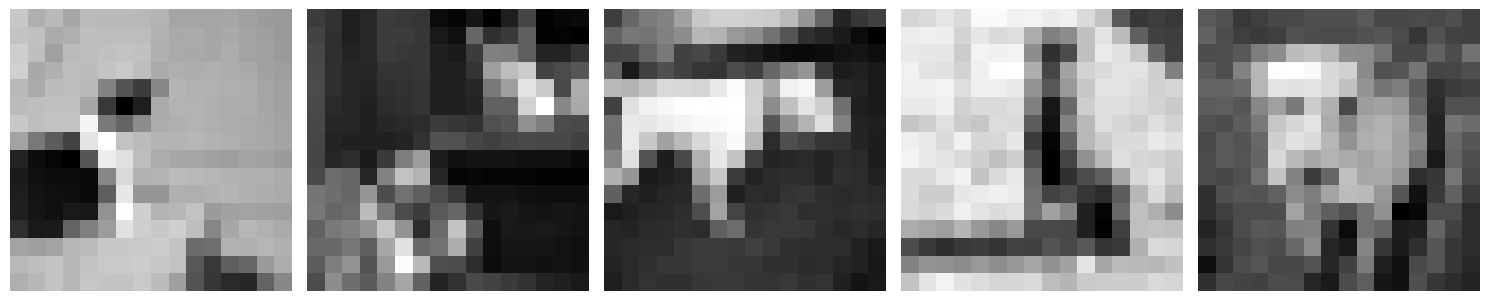

In [ ]:
random_nums = len(imagenes) * np.random.rand(5)
random_nums = random_nums.astype(int) #Convertir a enteros

fig, axes = plt.subplots(1, 5, figsize=(15, 5))
for i, ax in enumerate(axes):
    ax.imshow(imagenes[random_nums[i]], cmap='gray')
    ax.axis('off')
plt.tight_layout()
plt.show()

**4. Utilice el comando $\texttt{train\_test\_split}$ (sklearn) para definir dos conjuntos de datos. El conjunto de entrenamiento debe contener $20000$ muestras, el resto serán de testeo.**

&ensp; La variable `imagenes` es transformada mediante la función $\texttt{flatten}$, que convierte cada imagen de $16 \times 16$ píxeles en un vector fila de $256$ elementos, dando lugar a la matriz `X_data`, donde cada fila representa una imagen. A su vez, se construye el vector de salidas `Y_data`, asignando un valor de $1$ a las imágenes correspondientes a perros y un valor de $0$ a las de gatos.

In [169]:
X_data = np.array([np.array(im).flatten() for im in imagenes])

Y_data = []
for i in range(0, len(imagenes)):
    if (i < len(imagenes) / 2):
      Y_data.append(1)
    else:
      Y_data.append(0)

Y_data = np.array(Y_data)


&ensp; Se verifica que ambas variables tengan la dimensión esperada.

In [170]:
display(X_data.shape)
display(Y_data.shape)

(24998, 256)

(24998,)

&ensp;  Finalmente, ambas variables son utilizadas como entrada de la función $\texttt{train\_test\_split}$, que permite dividir el conjunto de datos en subconjuntos de entrenamiento y prueba, según el tamaño especificado que en este caso es de $20.000$ para el entrenamiento y lo restante para el testeo.

In [171]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, train_size = 20000)

---

#### (C). *Clasificación:*

**1. Utilizando $\texttt{LogisticRegression}$ (sklearn), realizar una regresión logística sin regularización.**

&ensp; En base a los conjuntos de datos separados en la etapa del pre-procesamiento para el entrenamiento, se realiza y se entrena una regresión logística sin regularización a partir de la función dada por la cátedra.

In [135]:
from sklearn.linear_model import LogisticRegression

Log_Reg = LogisticRegression(penalty = None, max_iter = 10000)
Log_Reg.fit(X_train, Y_train)

LogisticRegression(max_iter=10000, penalty=None)

**2. Implementar una función que permita calcular la accuracy a partir de la salida de predict. Reportar el accuracy de entrenamiento y testeo.**

&ensp; Se implementa la función `accuracy`, que permite calcular la precisión que tiene el modelo comparando la predicción con el valor real. Además, se generaliza el modelo que se le puede pasar para poder reutilizarla en puntos posteriores del trabajo.

In [136]:
def accuracy(X, Y, model):
  Y_pred = model.predict(X)
  return np.sum(Y == Y_pred) / len(Y)

&ensp; De esta manera, se obtienen los siguientes resultados.

In [178]:
accuracy_train = accuracy(X_train, Y_train, Log_Reg)
accuracy_test = accuracy(X_test, Y_test, Log_Reg)
print(f"Training Accuracy: {accuracy_train:.4f}")
print(f"Test Accuracy: {accuracy_test:.4f}")

Training Accuracy: 0.5821
Test Accuracy: 0.5824


**3. Implementar una función que permita calcular la cross-entropy a partir de la salida de $\texttt{predict\_log\_proba}$. Reportar la cross-entropy de entrenamiento y testeo.**

&ensp; Considerando la expresión de la *cross-entropy*:

$$ E[-\log \hat{P}(Y \mid X)] = -\frac{1}{n} \sum_{i=1}^{n} \left[ Y_i \log \hat{P}(Y_i = 1 \mid X_i) + (1 - Y_i) \log \hat{P}(Y_i = 0 \mid X_i) \right]$$

&ensp; Y entendiendo que el valor obtenido a partir de la función $\texttt{predict\_log\_proba}$ es el logaritmo de la probabilidad condicional, se desarrolla la función que se ve a continuación. Siendo $ \hat{P}(Y_i = 1 \mid X_i) $ la probabilidad de que la salida sea perro y $\hat{P}(Y_i = 0 \mid X_i)$ la de que sea gato.

In [179]:
def cross_entropy(X, Y, model):
  Y_log = model.predict_log_proba(X)
  return -np.sum(Y * Y_log[:, 1] + (1 - Y) * Y_log[:, 0]) / len(Y)

&ensp; Así, se obtienen los siguientes resultados.

In [180]:
cross_entropy_train = cross_entropy(X_train, Y_train, Log_Reg)
cross_entropy_test = cross_entropy(X_test, Y_test, Log_Reg)

print(f"Training Cross-Entropy: {cross_entropy_train:.4f}")
print(f"Test Cross-Entropy: {cross_entropy_test:.4f}")

Training Cross-Entropy: 0.6747
Test Cross-Entropy: 0.6766


**4. Crear una imagen de $16 \times 16$ a partir del consejero de la guía y clasificarlo.**

&ensp; A fin de clasificar al consejero, se descarga su imagen desde la URL de Github utilizando la librería `Requests` y se abre con la función $\texttt{Image.open}$. Luego, la imagen se convierte a escala de grises ('L'), se redimensiona a un tamaño de $16 \times 16$ píxeles y se la muestra.

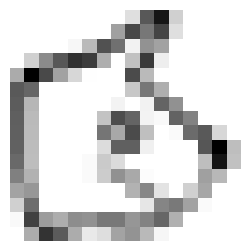

In [207]:
import requests

ruta_consejero = 'https://raw.githubusercontent.com/mvera1412/TA136-TB056-TB057-8625/refs/heads/main/data/consejero.png'
consejero = Image.open(requests.get(ruta_consejero, stream = True).raw)
consejero = consejero.convert('L').resize((16, 16))
plt.figure(figsize=(3, 3))
plt.imshow(consejero, cmap='gray')
plt.axis('off')
plt.show()

&ensp; Se setea la `X_consejero` para utilizar las funciones de la librería `SK Learn`.

In [183]:
X_consejero = np.array(consejero).flatten().reshape(1, -1)
display(X_consejero.shape)

(1, 256)

&ensp; De esta manera, se utiliza el modelo entrenado de regresión logística (`Log_Reg`) para clasificar la imagen del consejero previamente procesada. Primero, con el método predict, se obtiene una predicción "dura", es decir, una etiqueta binaria que indica si la imagen corresponde a un perro o a un gato. Luego, con el método predict_proba, se obtienen las probabilidades estimadas de pertenecer a cada clase, mostrando tanto la probabilidad de que la imagen sea un perro como de que sea un gato.

In [190]:
Y_hard_consejero = Log_Reg.predict(X_consejero)
if Y_hard_consejero == 1:
    print("El consejero es un perro")
else:   
    print("El consejero es un gato")

Y_soft_consejero = Log_Reg.predict_proba(X_consejero)
print(f"Probabilidad de que sea un perro: {Y_soft_consejero[0][1]:.4f}")
print(f"Probabilidad de que sea un gato: {Y_soft_consejero[0][0]:.4f}")

El consejero es un perro
Probabilidad de que sea un perro: 0.5531
Probabilidad de que sea un gato: 0.4469


---

#### (D). *Regularización:*

**Utilice un mapa polinómico de orden $2$ y un término de penalización para regularizar el problema. Indicar el accuracy tanto para el entrenamiento como el testeo.**

&ensp; En esta sección se evalúa el rendimiento de un modelo de regresión logística con regularización $L_2$, variando el parámetro de penalización $C = \frac{1}{\lambda}$ en una escala logarítmica. Para ello, se utiliza $\texttt{Pipeline}$ que primero realiza una transformación polinómica de orden $2$ con $\texttt{PolynomialFeatures}$, luego aplica una normalización $\texttt{StandardScaler}$, y finalmente entrena el modelo de regresión logística con los parámetros especificados.

&ensp; Se debe tener en cuenta que para cada valor de $C$, se entrena el modelo utilizando los datos de entrenamiento `X_train` e `Y_train` y se registran la *accuracy* y la *cross-entropy* tanto en el conjunto de entrenamiento como en el de prueba. Estas métricas se almacenan, permitiendo luego elegir el hiperparámetro con menor error de validación.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

C = [0.1, 0.01, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10]
accuracy_train_poli = np.zeros(len(C))
accuracy_test_poli = np.zeros(len(C))
CE_test_poli = np.zeros(len(C))
CE_train_poli = np.zeros(len(C))

for i in range(len(C)):
    pipeline = Pipeline([
    ("mapa_poli", PolynomialFeatures(degree = 2)),
    ("scaler", StandardScaler()),
    ("model", LogisticRegression(penalty = 'l2', C = C[i], max_iter = 500, tol = 1e-4))
    ])
    pipeline.fit(X_train, Y_train)
    accuracy_train_poli[i] = accuracy(X_train, Y_train, pipeline)
    accuracy_test_poli[i] = accuracy(X_test, Y_test, pipeline)
    CE_train_poli[i] = cross_entropy(X_train, Y_train, pipeline)
    CE_test_poli[i] = cross_entropy(X_test, Y_test, pipeline)

C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/

&ensp; A partir de esto, se grafican los datos obtenidos según cada valor de $C$. De esta manera, se puede obtener el valor de menor error de validación a partir del menor valor para la *cross-entropy*, ya que, es el valor mínimo del riesgo empírico.

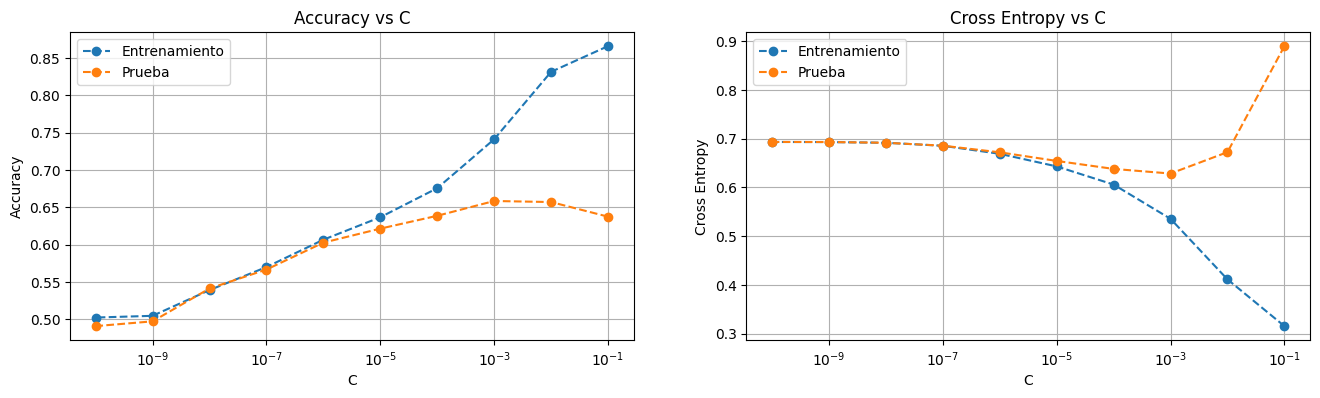

In [197]:
plt.figure(figsize = (16, 4))

plt.subplot(1, 2, 1)
plt.plot(C, accuracy_train_poli, label='Entrenamiento', linestyle = '--', marker = 'o')
plt.plot(C, accuracy_test_poli, label='Prueba', linestyle = '--', marker = 'o')
plt.xscale('log')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title('Accuracy vs C')
plt.legend(loc='upper left')
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(C, CE_train_poli, label = 'Entrenamiento', linestyle = '--', marker = 'o')
plt.plot(C, CE_test_poli, label = 'Prueba', linestyle = '--', marker = 'o')
plt.xscale('log')
plt.xlabel('C')
plt.ylabel('Cross Entropy')
plt.title('Cross Entropy vs C')
plt.legend(loc='upper left')
plt.grid()

plt.show()

---

#### (E). *ROC*

**A partir de la salida de $\texttt{predict\_proba}$ del conjunto de testeo, implementar la curva ROC. Comparar las ROC de los clasificadores con y sin regularización con la de uno que decide al azar.**

&ensp;  Se implementa la función `curva_ROC`, que calcula las tasas de verdaderos positivos o *TPR* y falsos positivos o *FPR* variando el umbral de decisión. Esto se realiza a partir de las probabilidades predichas por el modelo sobre el conjunto de testeo, según la función $\texttt{predict\_proba}$.

In [191]:
def curva_ROC(X, Y, model):
    x = np.linspace(0, 1, 100)
    Y_proba = model.predict_proba(X)

    TPR = []
    FPR = []

    for i in x:
        TP = np.sum((Y_proba[:, 1] >= i) & (Y == 1)) # TP: probabilidad de perro es mayor al umbral y es perro
        FP = np.sum((Y_proba[:, 1] >= i) & (Y == 0)) # FP: probabilidad de perro es mayor al umbral y es gato
        TN = np.sum((Y_proba[:, 1] < i) & (Y == 0)) # TN: probabilidad de perro es menor al umbral y es gato
        FN = np.sum((Y_proba[:, 1] < i) & (Y == 1)) # FN: probabilidad de perro es menor al umbral y es perro
        
        TPR_aux = TP / (TP + FN) 
        TPR.append(TPR_aux)
        FPR_aux = FP / (FP + TN)
        FPR.append(FPR_aux)

    return TPR, FPR

&ensp; Para esto, se vuelve a entrenar la regresión logística con el valor de $C$ que devuelve la menor *cross-entropy* del test. De esta manera, se usa la función $\texttt{argmin}$ que devuelve la posición del valor mínimo dentro de un array.

In [194]:
indice = np.argmin(CE_test_poli)
C_optimo = C[indice]
display(C_optimo)

0.001

&ensp; Así, se procede a inicializar y entrenar la regresión logística según lo ya realizado en el apartado anterior.

In [ ]:
pipe = Pipeline([
    ("mapa_poli", PolynomialFeatures(degree = 2)),
    ("scaler", StandardScaler()),
    ("model", LogisticRegression(penalty = 'l2', C = C_optimo, max_iter = 1000, tol = 1e-4))
    ])

pipe.fit(X_train, Y_train)

Pipeline(steps=[('mapa_poli', PolynomialFeatures()),
                ('scaler', StandardScaler()),
                ('model', LogisticRegression(C=0.001, max_iter=1000))])

&ensp; Finalmente, se compara gráficamente el desempeño de la regresión logística con y sin regularización, frente al de un clasificador aleatorio, tal como solicita el enunciado.

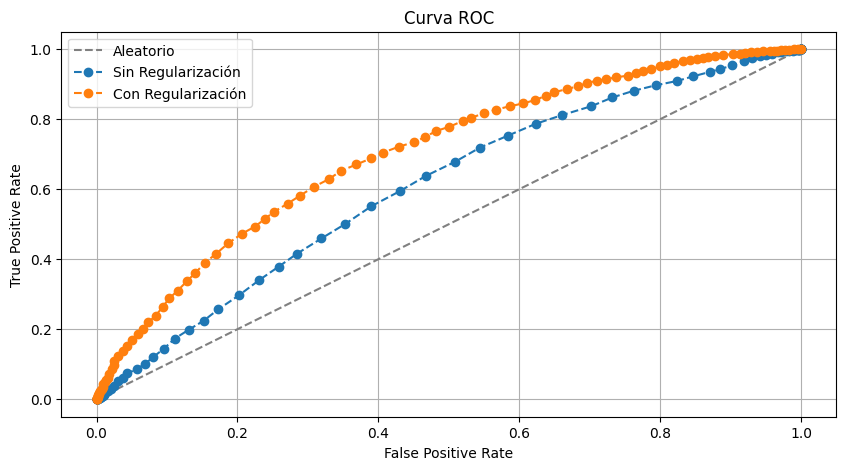

In [199]:
TPR_sin_reg, FPR_sin_reg = curva_ROC(X_test, Y_test, Log_Reg)
TPR_con_reg, FPR_con_reg = curva_ROC(X_test, Y_test, pipe)

x = np.linspace(0, 1, 100)
plt.figure(figsize=(10, 5))
plt.plot(x, x, label='Aleatorio', linestyle = '--', color = 'gray')
plt.plot(FPR_sin_reg, TPR_sin_reg, label='Sin Regularización', linestyle = '--', marker = 'o')
plt.plot(FPR_con_reg, TPR_con_reg, label='Con Regularización', linestyle = '--', marker = 'o')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid()
plt.legend()
plt.title('Curva ROC')
plt.show()

&ensp; De esta manera, se puede observar que la curva correspondiente al modelo con regularización se encuentra por encima de la del modelo sin regularización, lo que indica un mejor desempeño en términos de sensibilidad y especificidad. Además, ambos modelos superan la línea diagonal, que representa un clasificador aleatorio. Por lo tanto, todo esto demuestra que la regularización mejora la capacidad del modelo para discriminar entre perros y gatos, mejorando la generalización.

&ensp; Por último, a modo de curiosidad, se vuelve a analizar la imagen del consejero con el modelo regularizado, obteniendo así los siguientes resultados.

In [202]:
Y_hard_consejero_reg = pipe.predict(X_consejero)
if Y_hard_consejero_reg == 1:
    print("El consejero es un perro")
else:   
    print("El consejero es un gato")

Y_soft_consejero_reg = pipe.predict_proba(X_consejero)
print(f"Probabilidad de que sea un perro: {Y_soft_consejero_reg[0][1]:.4f}")
print(f"Probabilidad de que sea un gato: {Y_soft_consejero_reg[0][0]:.4f}")

El consejero es un gato
Probabilidad de que sea un perro: 0.2563
Probabilidad de que sea un gato: 0.7437


---
---

### <center> **Conclusiones**

&ensp; En este trabajo se abordó la clasificación de imágenes de gatos y perros mediante regresión logística, comenzando con el preprocesamiento de los datos: conversión a escala de grises, redimensionado y vectorización. Posteriormente, se entrenaron modelos utilizando tanto regresión logística sin regularización como con regularización, evaluando su desempeño sobre el conjunto de prueba.

&ensp;  En cuanto al desarrollo teórico, se presentaron la función sigmoide, su inversa y su derivada, que son importantes para la formulación del modelo de regresión logística. Estos resultados fueron utilizados a la hora de realizar el cálculo del gradiente de la función de costo $J$ que, en este caso, es la *cross-entropy*.

&ensp; Por otro lado, con el objetivo de determinar el hiperparámetro óptimo de regularización, se realizó un barrido sobre distintos valores del mismo, analizando cuál minimizaba la función de costo. Además, se graficaron las curvas ROC para comparar el desempeño de los modelos con y sin regularización frente a un clasificador aleatorio, observándose una clara ventaja del modelo regularizado en términos de sensibilidad y capacidad discriminativa.

&ensp; También se utilizó el modelo sin regularización para clasificar una imagen externa (el “consejero” de la guía), obteniendo un resultado determinado. Al aplicar el modelo regularizado sobre la misma imagen, se obtuvo una probabilidad de clasificación significativamente mayor y un resultado distinto, lo que evidenció una mejor capacidad de este para clasificar frente a ejemplos difíciles.

&ensp; Finalmente, este trabajo permitió profundizar en el diseño e implementación de modelos de clasificación en $\texttt{Python}$ mediante regresión logística. Se empleó una estructura modular y reutilizable, basada en programación orientada a objetos, lo cual facilitó la organización del código a lo largo del trabajo.
